In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
domains = [
    "www.bbc.com", "www.dw.com", "www.aljazeera.com",
    "www.nytimes.com", "www.theguardian.com", "www.washingtonpost.com"
]

results = []

for year in years:
    for domain in domains:
        url = "https://api.ooni.io/api/v1/aggregation"
        params = {
            "axis_x": "probe_cc",
            "axis_y": "domain",
            "test_name": "web_connectivity",
            "since": f"{year}-01-01",
            "until": f"{year}-12-31",
            "domain": domain
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            blocked_countries = set()
            anomalous_countries = set()

            for row in data.get("result", []):
                if row.get("confirmed_count", 0) > 0:
                    blocked_countries.add(row["probe_cc"])
                if row.get("anomaly_count", 0) > 0:
                    anomalous_countries.add(row["probe_cc"])

            results.append({
                "year": year,
                "domain": domain,
                "num_countries_confirmed": len(blocked_countries),
                "num_countries_anomalies": len(anomalous_countries)
            })
        else:
            results.append({
                "year": year,
                "domain": domain,
                "num_countries_confirmed": 0,
                "num_countries_anomalies": 0
            })

# Convert to DataFrame
df = pd.DataFrame(results)


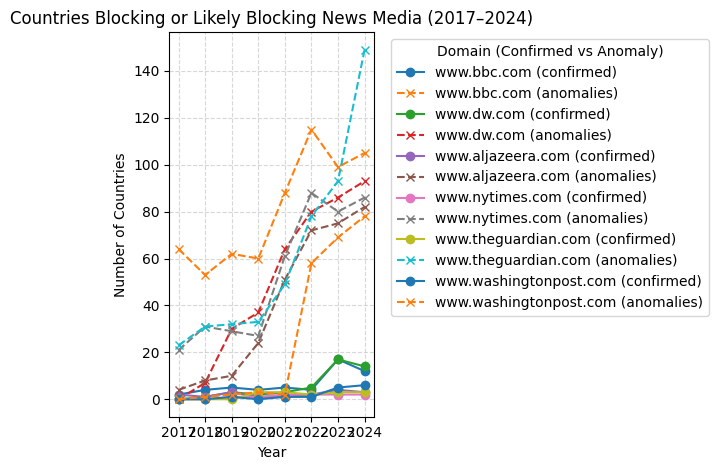

In [2]:
for domain in domains:
    subset = df[df["domain"] == domain]
    plt.plot(subset["year"], subset["num_countries_confirmed"], marker='o', label=f"{domain} (confirmed)")
    plt.plot(subset["year"], subset["num_countries_anomalies"], linestyle='--', marker='x', label=f"{domain} (anomalies)")

plt.title("Countries Blocking or Likely Blocking News Media (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.xticks(years)
plt.legend(title="Domain (Confirmed vs Anomaly)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
